In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

## input:艾美獎資料集(csv)

## goal:整理成可以與其他資料合併格式

## output:可合併資料集(csv)

In [2]:
Emmy_data = pd.read_csv('Emmy_Prime.csv')
# column字體大寫
Emmy_data = Emmy_data.rename(columns = str.title )
Emmy_data

Award_Title        Years  \
0                     Outstanding Drama Series  2020 Awards   
1                     Outstanding Drama Series  2020 Awards   
2                     Outstanding Drama Series  2020 Awards   
3                     Outstanding Drama Series  2020 Awards   
4                     Outstanding Drama Series  2020 Awards   
...                                        ...          ...   
22650  Most Outstanding Television Personality  1949 Awards   
22651  Most Outstanding Television Personality  1949 Awards   
22652          Most Popular Television Program  1949 Awards   
22653          Most Popular Television Program  1949 Awards   
22654          Most Popular Television Program  1949 Awards   

                 Finalist  Winner  \
0              Succession  Winner   
1        Better Call Saul     NaN   
2             Killing Eve     NaN   
3                   Ozark     NaN   
4         Stranger Things     NaN   
...                   ...     ...   
22650    Patricia Morison     NaN   
22651         Rita La Roy     NaN   
22652     Stump the Stars  Winner   
22653  Armchair Detective     NaN   
22654      Judy Splinters     NaN   

                                                  Groups  
0      Jesse Armstrong, (executive producer),, ,Adam ...  
1      Peter Gould, (executive producer),, ,Vince Gil...  
2      Sally Woodward Gentle, (executive producer),, ...  
3      Jason Bateman, (executive producer),, ,Chris M...  
4      Iain Paterson, (executive producer),, ,Shawn L...  
...                                                  ...  
22650                                                NaN  
22651                                                NaN  
22652                                        Mike Stokey  
22653                                                NaN  
22654                                                NaN  

[22655 rows x 5 columns]

## Rename Finalist to Title 

In [8]:
Emmy_data.rename(columns={"Finalist": "Title"},inplace=True)

In [4]:
def Clean_Years(data):
    # 得獎年份切割出來
    data.Years = data.Years.str.split().str.get(0)

    # 影集名稱統一為:Title
    data.rename(columns={'Finalist':'Title'},inplace=True)

    # 將winner 取代為1 沒得獎為0 
    data['Winner'] = data['Winner'].replace(np.nan,0)
    data['Winner'] = data['Winner'].replace('Winner',1)
    
    return data


# 得獎年份切割出來

In [3]:
Emmy_data.Years.str.split().str.get(0)

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
22650    1949
22651    1949
22652    1949
22653    1949
22654    1949
Name: Years, Length: 22655, dtype: object

In [5]:
Clean_Years(Emmy_data)

Award_Title Years            Finalist  \
0                     Outstanding Drama Series  2020          Succession   
1                     Outstanding Drama Series  2020    Better Call Saul   
2                     Outstanding Drama Series  2020         Killing Eve   
3                     Outstanding Drama Series  2020               Ozark   
4                     Outstanding Drama Series  2020     Stranger Things   
...                                        ...   ...                 ...   
22650  Most Outstanding Television Personality  1949    Patricia Morison   
22651  Most Outstanding Television Personality  1949         Rita La Roy   
22652          Most Popular Television Program  1949     Stump the Stars   
22653          Most Popular Television Program  1949  Armchair Detective   
22654          Most Popular Television Program  1949      Judy Splinters   

       Winner                                             Groups  
0           1  Jesse Armstrong, (executive producer),, ,Adam ...  
1           0  Peter Gould, (executive producer),, ,Vince Gil...  
2           0  Sally Woodward Gentle, (executive producer),, ...  
3           0  Jason Bateman, (executive producer),, ,Chris M...  
4           0  Iain Paterson, (executive producer),, ,Shawn L...  
...       ...                                                ...  
22650       0                                                NaN  
22651       0                                                NaN  
22652       1                                        Mike Stokey  
22653       0                                                NaN  
22654       0                                                NaN  

[22655 rows x 5 columns]

# Winner欄位做類別型欄位做區分 Winner Nan ⇒ 1 & 0

In [24]:
# 將winner 取代為1 沒得獎為0
Emmy_data['Winner'] = Emmy_data['Winner'].replace(np.nan,0)
Emmy_data['Winner'] = Emmy_data['Winner'].replace('Winner',1)

In [25]:
Emmy_data

Award_Title Years            Finalist  \
0                     Outstanding Drama Series  2020          Succession   
1                     Outstanding Drama Series  2020    Better Call Saul   
2                     Outstanding Drama Series  2020         Killing Eve   
3                     Outstanding Drama Series  2020               Ozark   
4                     Outstanding Drama Series  2020     Stranger Things   
...                                        ...   ...                 ...   
22650  Most Outstanding Television Personality  1949    Patricia Morison   
22651  Most Outstanding Television Personality  1949         Rita La Roy   
22652          Most Popular Television Program  1949     Stump the Stars   
22653          Most Popular Television Program  1949  Armchair Detective   
22654          Most Popular Television Program  1949      Judy Splinters   

       Winner                                             Groups  
0           1  Jesse Armstrong, (executive producer),, ,Adam ...  
1           0  Peter Gould, (executive producer),, ,Vince Gil...  
2           0  Sally Woodward Gentle, (executive producer),, ...  
3           0  Jason Bateman, (executive producer),, ,Chris M...  
4           0  Iain Paterson, (executive producer),, ,Shawn L...  
...       ...                                                ...  
22650       0                                                NaN  
22651       0                                                NaN  
22652       1                                        Mike Stokey  
22653       0                                                NaN  
22654       0                                                NaN  

[22655 rows x 5 columns]

## Groups 為導演團隊⇒ 取出前三名導演

In [27]:
# 資料清洗 groups
o = 0
while o < len(Emmy_data):
    word = ''
    for i in str(Emmy_data['Groups'][o]).split(',,'):
        if i != '':
            word += i.lstrip(' ,').split(',')[0] + ','
            Emmy_data.loc[o,'Groups'] = word.rstrip(',')
    print(o)
    o += 1

1
19322
19323
19324
19325
19326
19327
19328
19329
19330
19331
19332
19333
19334
19335
19336
19337
19338
19339
19340
19341
19342
19343
19344
19345
19346
19347
19348
19349
19350
19351
19352
19353
19354
19355
19356
19357
19358
19359
19360
19361
19362
19363
19364
19365
19366
19367
19368
19369
19370
19371
19372
19373
19374
19375
19376
19377
19378
19379
19380
19381
19382
19383
19384
19385
19386
19387
19388
19389
19390
19391
19392
19393
19394
19395
19396
19397
19398
19399
19400
19401
19402
19403
19404
19405
19406
19407
19408
19409
19410
19411
19412
19413
19414
19415
19416
19417
19418
19419
19420
19421
19422
19423
19424
19425
19426
19427
19428
19429
19430
19431
19432
19433
19434
19435
19436
19437
19438
19439
19440
19441
19442
19443
19444
19445
19446
19447
19448
19449
19450
19451
19452
19453
19454
19455
19456
19457
19458
19459
19460
19461
19462
19463
19464
19465
19466
19467
19468
19469
19470
19471
19472
19473
19474
19475
19476
19477
19478
19479
19480
19481
19482
19483
19484
19485
19486
19487
19

## 取出前三名導演

In [30]:
# 將groups 分出 Director_1
Emmy_data['Director_1'] = Emmy_data['Groups'].str.split(',').str.get(0)

In [33]:
Emmy_data['Director_2'] = Emmy_data['Groups'].str.split(',').str.get(1)

In [35]:
Emmy_data['Director_3'] = Emmy_data['Groups'].str.split(',').str.get(2)

In [36]:
missing_values_count = Emmy_data.isnull().sum()
missing_values_count[0:10]

Award_Title       83
Years              0
Title            154
Winner             0
Groups             0
Director_1         0
Director_2     12878
Director_3     15414
dtype: int64

In [38]:
# 刪除 入圍者為 na 項目
Emmy_data['Title'] = Emmy_data['Title'].dropna()

In [40]:
# data schema transfrom 
Emmy_data['Years'] = Emmy_data['Years'].astype(str).astype(int)

## 將獎項欄位進行 one-Hot Encoding 轉換

In [51]:
awards = pd.get_dummies(Emmy_data.Award_Title)
awards

Achievements in Daytime Programming - Programs  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
22650                                               0   
22651                                               0   
22652                                               0   
22653                                               0   
22654                                               0   

       Achievements in Educational Television - Individuals  \
0                                                      0      
1                                                      0      
2                                                      0      
3                                                      0      
4                                                      0      
...                                                  ...      
22650                                                  0      
22651                                                  0      
22652                                                  0      
22653                                                  0      
22654                                                  0      

       Achievements in Educational Television - Programs  \
0                                                      0   
1                                                      0   
2                                                      0   
3                                                      0   
4                                                      0   
...                                                  ...   
22650                                                  0   
22651                                                  0   
22652                                                  0   
22653                                                  0   
22654                                                  0   

       Actor - Best Single Performance - Lead or Support  \
0                                                      0   
1                                                      0   
2                                                      0   
3                                                      0   
4                                                      0   
...                                                  ...   
22650                                                  0   
22651                                                  0   
22652                                                  0   
22653                                                  0   
22654                                                  0   

       Actor of the Year - Series  Actor of the Year - Special  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   
...                           ...                          ...   
22650                           0                            0   
22651                           0                            0   
22652                           0                            0   
22653                           0                            0   
22654                           0                            0   

       Actress - Best Single Performance - Lead or Support  \
0                                                      0     
1                                                      0     
2                                                      0     
3                                                      0     
4                   

In [52]:
Emmy_data = pd.concat([Emmy_data,awards],axis=1)
Emmy_data

Award_Title  Years               Title  \
0                     Outstanding Drama Series   2020          Succession   
1                     Outstanding Drama Series   2020    Better Call Saul   
2                     Outstanding Drama Series   2020         Killing Eve   
3                     Outstanding Drama Series   2020               Ozark   
4                     Outstanding Drama Series   2020     Stranger Things   
...                                        ...    ...                 ...   
22650  Most Outstanding Television Personality   1949    Patricia Morison   
22651  Most Outstanding Television Personality   1949         Rita La Roy   
22652          Most Popular Television Program   1949     Stump the Stars   
22653          Most Popular Television Program   1949  Armchair Detective   
22654          Most Popular Television Program   1949      Judy Splinters   

       Winner                                             Groups  \
0           1  Jesse Armstrong,Adam McKay,Will Ferrell,Frank ...   
1           0  Peter Gould,Vince Gilligan,Mark Johnson,Thomas...   
2           0  Sally Woodward Gentle,Lee Morris,Phoebe Waller...   
3           0  Jason Bateman,Chris Mundy,Bill Dubuque,Mark Wi...   
4           0  Iain Paterson,Shawn Levy,Dan Cohen,Matt Duffer...   
...       ...                                                ...   
22650       0                                                nan   
22651       0                                                nan   
22652       1                                        Mike Stokey   
22653       0                                                nan   
22654       0                                                nan   

                  Director_1      Director_2            Director_3  \
0            Jesse Armstrong      Adam McKay          Will Ferrell   
1                Peter Gould  Vince Gilligan          Mark Johnson   
2      Sally Woodward Gentle      Lee Morris  Phoebe Waller-Bridge   
3              Jason Bateman     Chris Mundy          Bill Dubuque   
4              Iain Paterson      Shawn Levy             Dan Cohen   
...                      ...             ...                   ...   
22650                    nan             NaN                   NaN   
22651                    nan             NaN                   NaN   
22652            Mike Stokey             NaN                   NaN   
22653                    nan             NaN                   NaN   
22654                    nan             NaN                   NaN   

       Achievements in Daytime Programming - Programs  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
22650                                               0   
22651                                               0   
22652                                               0   
22653                                               0   
22654                                               0   

       Achievements in Educational Television - Individuals  ...  \
0                                                      0     ...   
1                                                      0     ...   
2                                                      0     ...   
3                                                      0     ...   
4                                                      0     ...   
...                                                  ...     ...   
22650                                                  0     ...   
22651                                                  0     ...   
22652                                                  0     ...   
22653                                                  0     ...   
22654              

In [23]:
''' 以得獎者與得獎影集做區分 假如說得獎者為人 group 會是影集名稱  假如是影集會是 製作團隊
    現在要將得獎者為人的title 換成影集'''

' 以得獎者與得獎影集做區分 假如說得獎者為人 group 會是影集名稱  假如是影集會是 製作團隊\n    現在要將得獎者為人的title 換成影集'

In [54]:
# 列出最常出現前10名
title_counts = Emmy_data['Award_Title'].value_counts()
title_counts[:10]

Outstanding Comedy Series                            284
Outstanding Drama Series                             253
Outstanding Lead Actress in a Comedy Series          247
Outstanding Lead Actor in a Comedy Series            244
Outstanding Lead Actress in a Drama Series           243
Outstanding Lead Actor in a Drama Series             243
Outstanding Supporting Actor in a Drama Series       228
Outstanding Supporting Actress in a Drama Series     224
Outstanding Supporting Actress in a Comedy Series    210
Outstanding Children's Program                       209
Name: Award_Title, dtype: int64

<AxesSubplot:>

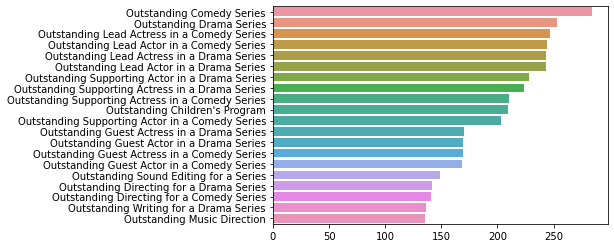

In [55]:
# 將前20名最多入圍獎列出
subset = title_counts[:20]
sns.barplot(y = subset.index , x = subset.values)

## 將資料存放到資料庫給另一位夥伴

In [56]:
Emmy_data.to_csv('Emmy_Prime_first_transform.csv',index=False)

In [11]:
pf = pd.read_csv('./Clean_DataFrame.csv')
pf

Unnamed: 0  Unnamed: 0.1                               Award_Title  \
0               0             0                  Outstanding Drama Series   
1               1             8                 Outstanding Comedy Series   
2               2            16                Outstanding Limited Series   
3               3            21              Outstanding Television Movie   
4               4            26  Outstanding Lead Actor in a Drama Series   
...           ...           ...                                       ...   
21529       21529         22462            Best Series Supporting Actress   
21530       21530         22463            Best Series Supporting Actress   
21531       21531         22464            Best Series Supporting Actress   
21532       21532         22465            Best Series Supporting Actress   
21533       21533         22569                          Best Comedy Show   

       Years                                Finalist  Winner  \
0       2020                              Succession       1   
1       2020                          Schitt's Creek       1   
2       2020                                Watchmen       1   
3       2020                           Bad Education       1   
4       2020                              Succession       1   
...      ...                                     ...     ...   
21529   1954                 The Jackie Gleason Show       0   
21530   1954  The George Burns and Gracie Allen Show       0   
21531   1954                          Mister Peepers       0   
21532   1954                   The Milton Berle Show       0   
21533   1952                             I Love Lucy       0   

                                                  Groups  \
0      Jesse Armstrong,Adam McKay,Will Ferrell,Frank ...   
1      Eugene Levy,Dan Levy,Andrew Barnsley,Fred Levy...   
2      Damon Lindelof,Tom Spezialy,Nicole Kassell,Ste...   
3      Leonid Lebedev,Caroline Jaczko,Fred Berger,Edd...   
4                                          Jeremy Strong   
...                                                  ...   
21529                                     Audrey Meadows   
21530                                      Bea Benaderet   
21531                                       Marion Lorne   
21532                                       Ruth Gilbert   
21533             Desi Arnaz,Jess Oppenheimer,Desi Arnaz   

                                     producer        producer_2  \
0                             Jesse Armstrong        Adam McKay   
1                                 Eugene Levy          Dan Levy   
2                              Damon Lindelof      Tom Spezialy   
3                              Leonid Lebedev   Caroline Jaczko   
4                                  Succession               NaN   
...                                       ...               ...   
21529                 The Jackie Gleason Show               NaN   
21530  The George Burns and Gracie Allen Show               NaN   
21531                          Mister Peepers               NaN   
21532                   The Milton Berle Show               NaN   
21533                              Desi Arnaz  Jess Oppenheimer   

       Achievements in Daytime Programming - Programs  ...  \
0                                                   0  ...   
1                                                   0  ...   
2                                                   0  ...   
3                                                   0  ...   
4                                                   0  ...   
...                                               ...  ...   
21529                                               0  ...   
21530                                               0  ...   
21531                                               0  ...   
21532                                               0  ...   
21533                                               0  ...   

       Special Classification of Outstandi

In [12]:
pf.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [14]:
pf.drop('producer_2',axis=1 ,inplace=True)

In [16]:
# 重新建立兩項 director director2
pf['Director_2'] = pf.Groups.str.split(',').str.get(1)

In [19]:
# 建立只有影集的得獎
pf.dropna(subset=['Director_2'],inplace=True)

In [36]:
year = 2020
get_all ={}
while year > 1947:
    Year = set()
    for i in pf[pf['Years']==year]['Finalist']:
        Year.add(i)
    get_all[str(year)] = Year

KeyboardInterrupt: 

In [37]:
get_all['2020']

{'2020 Golden Globe Awards',
 'A Black Lady Sketch Show',
 'A Celebration of the Music from Coco',
 'A Very Brady Renovation',
 'Abstract: The Art of Design',
 "America's Got Talent",
 'American Horror Story',
 'American Masters',
 'American Music Awards 2019',
 'American Son',
 'Amy Schumer Learns to Cook',
 'Antiques Roadshow',
 'At Home with Amy Sedaris',
 'Bad Education',
 'Beastie Boys Story',
 'Better Call Saul',
 'Better Call Saul: Ethics Training with Kim Wexler',
 'Between Two Ferns: The Movie',
 'Big Little Lies',
 'Big Mouth',
 'Black-ish',
 'BoJack Horseman',
 "Bob's Burgers",
 'Born This Way',
 'Carnival Row',
 'Carpool Karaoke',
 'Catherine the Great',
 'Chasing the Moon',
 'Cheer',
 'Cosmos: Possible Worlds',
 'Create Together',
 'Curb Your Enthusiasm',
 'Dancing with the Stars',
 'Dave Chappelle: Sticks & Stones',
 'Dave Chappelle: The Kennedy Center Mark Twain Prize for American Humor',
 'Dead to Me',
 'Deadliest Catch',
 'Devs',
 "Dolly Parton's Heartstrings",
 'Drunk

In [65]:
#year winner change type to str( )
for i in range(len(pf)):
    if i  == 0:
        first = pf.iloc[i]
        second = pf.iloc[i+1]
        first.combine_first(second)
    print(first)

iter of the Year - Special                                                    0
Director_2                                                             Adam McKay
Director_1                                                        Jesse Armstrong
Name: 0, Length: 1087, dtype: object
Award_Title                                              Outstanding Drama Series
Years                                                                        2020
Finalist                                                               Succession
Winner                                                                          1
Groups                          Jesse Armstrong,Adam McKay,Will Ferrell,Frank ...
                                                      ...                        
The Program of the Year                                                         0
Writer of the Year - Series                                                     0
Writer of the Year - Special                                   

# combine 
select [7:] from table group by 2020

def f(x,y);
     return x+y
x= x.rdd()
y= 
.mapper(f)

# 使用mysql 匯入 以及pysql 操作先暫停 
# 先用把同一年同一齣影集合併

In [21]:
pf  = pf.sort_values(by = ['Finalist','Years'] ,ascending=False)

In [23]:
pf

Award_Title  Years  \
8359                      Outstanding Children's Program   2013   
8773                      Outstanding Children's Program   2012   
9181                      Outstanding Children's Program   2011   
9247   Outstanding Hairstyling for a Multi-Camera Ser...   2011   
9269   Outstanding Makeup for a Multi-Camera Series o...   2011   
...                                                  ...    ...   
1352                      Outstanding Nonfiction Special   2009   
12038            Outstanding Reality/Competition Program   2003   
11930  Outstanding Special Visual Effects for a Minis...   2004   
4281   Outstanding Achievement in Technical Direction...   1972   
4304   Outstanding Single Program - Variety or Musica...   1972   

                                      Finalist  Winner  \
8359                                    iCarly       0   
8773                                    iCarly       0   
9181                                    iCarly       0   
9247                                    iCarly       0   
9269                                    iCarly       0   
...                                        ...     ...   
1352          102 Minutes That Changed America       1   
12038              100 Years of Hope and Humor       0   
11930                                     10.5       0   
4281   'S Wonderful, 'S Marvelous, 'S Gershwin       1   
4304   'S Wonderful, 'S Marvelous, 'S Gershwin       1   

                                                  Groups  \
8359   Dan Schneider,Robin Weiner,Joe Catania,Jake Fa...   
8773   Dan Schneider,Robin Weiner,Joe Catania,Jake Fa...   
9181   Dan Schneider,Robin Weiner,George Doty IV,Joe ...   
9247   Maria Valdivia,Kim Messina,Cyndra Dunn,David L...   
9269   Michael Johnston,Patti Brand,Melanie Mills,Tys...   
...                                                  ...   
1352   Greg Jacobs,Jon Siskel,Susan Werbe,Nicole Ritt...   
12038                  Gary Smith,Linda Hope,Dann Netter   
11930  Lee Wilson,Lisa K. Sepp,S�bastien Bergeron,Jea...   
4281   Al Camoin,Frank Gaeta,Gene Martin,Don Mulvaney...   
4304             Joseph Cates,Martin Charnin,Jack Lemmon   

       Achievements in Daytime Programming - Programs  \
8359                                                0   
8773                                                0   
9181                                                0   
9247                                                0   
9269                                                0   
...                                               ...   
1352                                                0   
12038                                               0   
11930                                               0   
4281                                                0   
4304                                                0   

       Achievements in Educational Television - Individuals  \
8359                                                   0      
8773                                                   0      
9181                                                   0      
9247                                                   0      
9269                                                   0      
...                                                  ...      
1352                                                   0      
12038                                                  0      
11930                                                  0      
4281                                                   0      
4304                                                   0      

       Achievements in Educational Television - Programs  \
8359                                                   0   
8773                                                   0   
9181                                                   0   
9247                                                   0   
9269                                                   0   
...                 

In [92]:
first = first.to_frame().T

In [96]:
first.iloc[0]['Outstanding Children\'s Program']

1

In [42]:
second = pf.groupby(['Years','Finalist']).sum()

In [70]:
second.to_csv('prime_title.csv',index=False)

In [69]:
second.drop('Winner',axis=1,inplace=True)

In [44]:
second.reset_index(inplace=True)

Empty DataFrame
Columns: [Years, Finalist, Achievements in Daytime Programming - Programs, Achievements in Educational Television - Individuals, Achievements in Educational Television - Programs, Actor - Best Single Performance - Lead or Support, Actor of the Year - Series, Actor of the Year - Special, Actress - Best Single Performance - Lead or Support, Actress of the Year - Series, Actress of the Year - Special, Art Director and Set Decorator of the Year, Best Actor - Continuing Performance, Best Actor - Single Performance, Best Actor Starring in a Regular Series, Best Actor in a Leading Role (Continuing Character) in a Comedy Series, Best Actor in a Leading Role (Continuing Character) in a Dramatic Series, Best Actor in a Single Performance, Best Actor in a Supporting Role, Best Actress - Continuing Performance, Best Actress - Single Performance, Best Actress Starring in a Regular Series, Best Actress in a Leading Role (Continuing Character) in a Comedy Series, Best Actress in a Leading Role (Continuing Character) in a Dramatic Series, Best Actress in a Single Performance, Best Actress in a Supporting Role, Best Art Direction, Best Art Direction - Film Series, Best Art Direction - Half Hour or Less, Best Art Direction - Live Series, Best Art Direction - One Hour or More, Best Art Direction in a Live Television Program, Best Art Direction in a Television Film, Best Art Direction of a Filmed Show, Best Art Direction of a Live Show, Best Art Direction or Scenic Design - For a Dramatic Program or Feature Length Film, for a Series, a Single Program of a Series or a Special Program, Best Art Direction or Scenic Design - For a Musical or Variety Single Program of a Series or a Special Program, Best Camerawork - Live Show, Best Choreographer, Best Choreography for Television, Best Cinematography for Entertainment Programming - For a Series or a Single Program of a Series, Best Cinematography for Entertainment Programming - For a Special or Feature Length Program Made for Television, Best Cinematography for Television, Best Comedy Show, Best Comedy Writing, Best Comedy Writing - Variety or Situation Comedy, Best Continuing Performance (Female) in a Series by a Comedienne, Singer, Hostess, Dancer, M.C., Announcer, Narrator, Panelist, or any Person who Essentially Plays Herself, Best Continuing Performance (Male) in a Series by a Comedian, Singer, Host, Dancer, M.C., Announcer, Narrator, Panelist, or any Person who Essentially Plays Himself, Best Continuing Performance by a Comedian in a Series, Best Continuing Performance by a Comedienne in a Series, Best Continuing Performance by an Actor in a Dramatic Series, Best Continuing Performance by an Actor in a Leading Role in a Dramatic or Comedy Series, Best Continuing Performance by an Actress in a Dramatic Series, Best Continuing Performance by an Actress in a Leading Role in a Dramatic or Comedy Series, Best Continuing Supporting Performance by an Actor in a Dramatic or Comedy Series, Best Continuing Supporting Performance by an Actress in a Dramatic or Comedy Series, Best Contributing to Daytime Programming, Best Directing in Comedy, Best Directing in Comedy-Variety, Variety or Music, Best Directing in Drama - A Single Program - Comedy or Drama, Best Directing in Drama - A Single Program of a Series with Continuing Characters and/or Theme, Best Directing in Variety or Music, Best Direction, Best Direction - Half Hour or Less, Best Direction - One Hour or More, Best Direction of Photography, Best Direction of a Single Dramatic Program - One Hour or Longer, Best Direction of a Single Musical or Variety Program, Best Direction of a Single Program of a Comedy Series, Best Direction of a Single Program of a Dramatic Series - Less Than One Hour, Best Director - Film Series, Best Director - Live Series, Best Editing of a Film for Television, Best Editing of a Television Film, Best Engineering Effects, Best Female Star of Regular Series, Best Film Editing for Entertainment Programming - For 

In [52]:
director = pf[['Years','Finalist','Director_1','Director_2']]

In [56]:
director_merge = pd.merge(second,director,left_on=['Years','Finalist'],right_on=['Years','Finalist'],how = 'inner')

In [57]:
director_merge[director_merge['Finalist'] == 'Succession']

Years    Finalist  Winner  \
9324   2019  Succession       0   
9325   2019  Succession       0   
9639   2020  Succession       2   
9640   2020  Succession       2   
9641   2020  Succession       2   

      Achievements in Daytime Programming - Programs  \
9324                                               0   
9325                                               0   
9639                                               0   
9640                                               0   
9641                                               0   

      Achievements in Educational Television - Individuals  \
9324                                                  0      
9325                                                  0      
9639                                                  0      
9640                                                  0      
9641                                                  0      

      Achievements in Educational Television - Programs  \
9324                                                  0   
9325                                                  0   
9639                                                  0   
9640                                                  0   
9641                                                  0   

      Actor - Best Single Performance - Lead or Support  \
9324                                                  0   
9325                                                  0   
9639                                                  0   
9640                                                  0   
9641                                                  0   

      Actor of the Year - Series  Actor of the Year - Special  \
9324                           0                            0   
9325                           0                            0   
9639                           0                            0   
9640                           0                            0   
9641                           0                            0   

      Actress - Best Single Performance - Lead or Support  ...  \
9324                                                  0    ...   
9325                                                  0    ...   
9639                                                  0    ...   
9640                                                  0    ...   
9641                                                  0    ...   

      Special Classification of Outstanding Program and Individual Achievement - Programs  \
9324                                                  0                                     
9325                                                  0                                     
9639                                                  0                                     
9640                                                  0                                     
9641                                                  0                                     

      Special Classification of Outstanding Program and Individual Achievements - Programs  \
9324                                                  0                                      
9325                                                  0                                      
9639                                                  0                                      
9640                                                  0                                      
9641                                                  0                                      

      Special Classifications of Individual Achievements  \
9324                                                  0    
9325                                                  0    
9639                                                  0    
9640                                                  0    
9641                                                  0    

      Supporting Actor of the Year  Supporting Actress of the Year  \
9324                            

# 11.30 data split and combine